In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("G:\INeuron_data_science_assignment\maze.csv")

In [4]:
df.head()

,Unnamed: 0,id,url,name,season,number,type,airdate,airtime,runtime,summary,average_rating,medium_image_link,original_image_link
0,0,869671,https://www.tvmaze.com/episodes/869671/westwor...,The Original,1,1,regular,2016-10-02,09:00 PM,68.0,A woman named Dolores is a free spirit in the ...,8.0,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
1,1,911201,https://www.tvmaze.com/episodes/911201/westwor...,Chestnut,1,2,regular,2016-10-09,09:00 PM,60.0,Bernard suspects that someone is sabotaging th...,7.7,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
2,2,1214222,https://www.tvmaze.com/episodes/1214222/westwo...,Journey Into Night,2,1,regular,2018-04-22,09:00 PM,74.0,"In the aftermath of the host rebellion, the re...",7.8,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
3,3,1440915,https://www.tvmaze.com/episodes/1440915/westwo...,Reunion,2,2,regular,2018-04-29,09:00 PM,60.0,Dolores looks for allies sympathetic to her ca...,7.7,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
4,4,1440916,https://www.tvmaze.com/episodes/1440916/westwo...,Virtù e Fortuna,2,3,regular,2018-05-06,09:00 PM,60.0,While Delores makes a deal with the Confederad...,7.7,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           36 non-null     int64  
 1   id                   36 non-null     int64  
 2   url                  36 non-null     object 
 3   name                 36 non-null     object 
 4   season               36 non-null     int64  
 5   number               36 non-null     int64  
 6   type                 36 non-null     object 
 7   airdate              36 non-null     object 
 8   airtime              36 non-null     object 
 9   runtime              36 non-null     float64
 10  summary              36 non-null     object 
 11  average_rating       36 non-null     float64
 12  medium_image_link    36 non-null     object 
 13  original_image_link  36 non-null     object 
dtypes: float64(2), int64(4), object(8)
memory usage: 4.1+ KB


In [6]:
df.drop('Unnamed: 0', axis=1,inplace=True)

In [7]:
df['airdate'] = pd.to_datetime(df['airdate'])

- Get all the overall ratings for each season and using plots compare the ratings for all the seasons, like season 1 ratings, season 2, and so on

In [8]:
df1 =df.groupby(['season'])['average_rating'].mean()

<Axes: xlabel='season'>

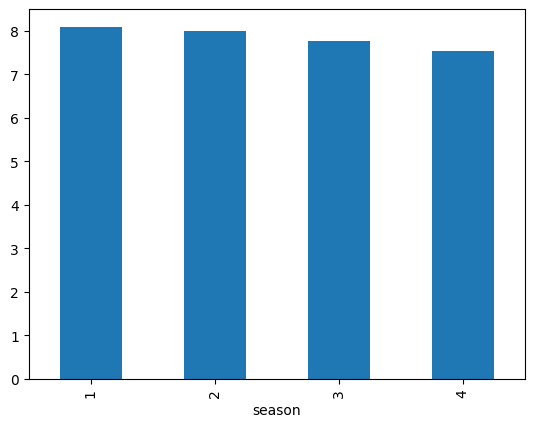

In [10]:
import matplotlib.pyplot as pt
%matplotlib inline

df1.plot.bar()

- Get all the episode names that aired before May 2019

In [159]:
import datetime
date_before = datetime.datetime(2019, 5, 1)
df[df['airdate'] < date_before]['name']

0                  The Original
1                      Chestnut
2            Journey Into Night
3                       Reunion
4               Virtù e Fortuna
5      The Riddle of the Sphinx
6                  Akane No Mai
7                   Phase Space
8                  Les Écorchés
9                       Kiksuya
10              Vanishing Point
11                The Passenger
12                    The Stray
23            Dissonance Theory
30                  Contrapasso
31                The Adversary
32                Trompe L'Oeil
33                  Trace Decay
34    The Well-Tempered Clavier
35           The Bicameral Mind
Name: name, dtype: object

- Get the episode name from each season with the highest and lowest rating

In [139]:
df.groupby(['season'])[['name','average_rating']].aggregate([min,max])

name                  average_rating     
                  min              max            min  max
season                                                    
1            Chestnut    Trompe L'Oeil            7.6  8.7
2        Akane No Mai  Virtù e Fortuna            7.6  8.7
3       Crisis Theory  The Winter Line            7.5  8.0
4       Années Folles         Zhuangzi            7.1  7.8

- Get the summary for the most popular ( ratings ) episode in every season

In [138]:
df.groupby(['season'])[['summary','average_rating']].max()

,summary,average_rating
season,,
1,While William and Dolores travel to the unclai...,8.7
2,William pays his recuperating father-in-law se...,8.7
3,Time to face the music. Dolores' true intentio...,8.0
4,You want to have a drink at a time like this?,7.8
